# get_related_sustainability_tweets

In [1]:
from pymongo import MongoClient
client = MongoClient()
db = client.environment
sustainability_collection = db.sustainability

In [2]:
from word_clouds import generate_wordcloud_cluster

In [3]:
import pandas as pd

In [4]:
import pickle

with open('sustainability_clusters.pickle','rb') as read_file:
    nmf_tfidf_clusters = pickle.load(read_file)

In [5]:
with open('vectorized_tfidfdata.pickle','rb') as read_file:
    nmf_tfidf_data = pickle.load(read_file)

In [6]:
with open('tweet_df.pickle','rb') as read_file:
    tweet_df = pickle.load(read_file)

In [7]:
with open('clust_names.pickle','rb') as read_file:
    clust_names = pickle.load(read_file)

In [8]:
with open('clustered_tweets.pickle','rb') as read_file:
    clustered_tweets = pickle.load(read_file)

In [9]:
def get_tweets(nmf_tfidf_data, nmf_tfidf_clusters, idx):
    df = pd.DataFrame(nmf_tfidf_clusters, columns = ['cluster'])
    df = df[df['cluster'] == nmf_tfidf_clusters[idx]]
    
    return(list(df.sample(10).index)) #Returns list of 10 indices with tweets in the same cluster

In [10]:
recommended_tweets = get_tweets(nmf_tfidf_data, nmf_tfidf_clusters, 30)

In [11]:
clustered_tweets = clustered_tweets.groupby(by = 'clusters', as_index = False).mean()

In [12]:
def print_tweets(idx,recommended_tweets):
    
    #print information on tweets
    print('Tweet:',idx,' \n')
    print('Polarity:',round(tweet_df.loc[idx].polarity,2) )
    print('Subjectivity:',round(tweet_df.loc[idx].subjectivity,2))
    print('\n',sustainability_collection.find()[idx]['text'])
    print('\n------\n')
    
    #print information on cluster
    clust_num = tweet_df.loc[idx].clusters
    cluster_name = clust_names.loc[clust_num].clust_names
    print('Cluster Name:', cluster_name, '\n')
    print('Cluster Polarity:', round(clustered_tweets[clustered_tweets.clusters == clust_num].polarity[clust_num],2))
    print('Cluster Subjectivity:', round(clustered_tweets[clustered_tweets.clusters == clust_num].subjectivity[clust_num],2))
    
    #generate word cloud
    generate_wordcloud_cluster(clust_num)
    
    #recommend 10 additional tweets in cluster
    for rec_idx in recommended_tweets:
        print('\n --- Result --- \n')
        print(sustainability_collection.find()[rec_idx]['text'])

In [13]:
def show_tweet_info(index_num):
    recommended_tweets = get_tweets(nmf_tfidf_data, nmf_tfidf_clusters, index_num)
    print_tweets(index_num, recommended_tweets)

Tweet: 100  

Polarity: -0.2
Subjectivity: 0.0

 Waste To Energy : #sustainability #waste #MSW #bio #environment #alternativeenergy #cleanenergy #municipality… https://t.co/obav10A9DA

------

Cluster Name: Renewable Energy 

Cluster Polarity: 0.14
Cluster Subjectivity: 0.33


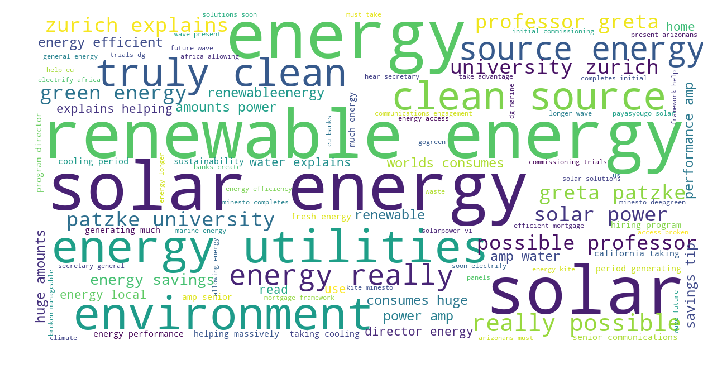


 --- Result --- 

RT @aplncDSGN: The competitions encourage students to design energy-efficient #HVAC systems https://t.co/LZvrEt2S4O @ashraenews #sustainabi…

 --- Result --- 

RT @mathieuflamini: Losing isn’t about falling, it’s about failing to get up.  #hardworkpaysoffs #sports #sustainability #makeachange 💪🏽🌎 h…

 --- Result --- 

Don’t let the society tame your wilderness, because we all were born to be wild and free. This independence day, be… https://t.co/UiLnEcXL2T

 --- Result --- 

RT @kashthefuturist: What is your #country doing to stop #plastic #polluting the #oceans?

#Sustainability #waste #CircularEconomy

@seasav…

 --- Result --- 

フラミニ社長、ボクシングを嗜む。

 --- Result --- 

RT @evankirstel: This bacteria makes concrete repair itself! 🏗🚧
#amazing #construction #stem #Sustainability #building #Engineering #tech h…

 --- Result --- 

Share if You Agree:
"Electricity will soon be Made by the PEOPLE and for the PEOPLE"

#blockchain #renewables… https://t.co/wubi4rdyGK

 --- Resu

In [24]:
show_tweet_info(100)